In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('50_Startups.csv')

In [71]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [73]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [74]:
df = df.drop('State',axis=1)

In [75]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [76]:
df=df.copy()
df=df.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
df.head

<bound method NDFrame.head of           RnD      admin  marketing     profit
0   165349.20  136897.80  471784.10  192261.83
1   162597.70  151377.59  443898.53  191792.06
2   153441.51  101145.55  407934.54  191050.39
3   144372.41  118671.85  383199.62  182901.99
4   142107.34   91391.77  366168.42  166187.94
5   131876.90   99814.71  362861.36  156991.12
6   134615.46  147198.87  127716.82  156122.51
7   130298.13  145530.06  323876.68  155752.60
8   120542.52  148718.95  311613.29  152211.77
9   123334.88  108679.17  304981.62  149759.96
10  101913.08  110594.11  229160.95  146121.95
11  100671.96   91790.61  249744.55  144259.40
12   93863.75  127320.38  249839.44  141585.52
13   91992.39  135495.07  252664.93  134307.35
14  119943.24  156547.42  256512.92  132602.65
15  114523.61  122616.84  261776.23  129917.04
16   78013.11  121597.55  264346.06  126992.93
17   94657.16  145077.58  282574.31  125370.37
18   91749.16  114175.79  294919.57  124266.90
19   86419.70  153514.11      

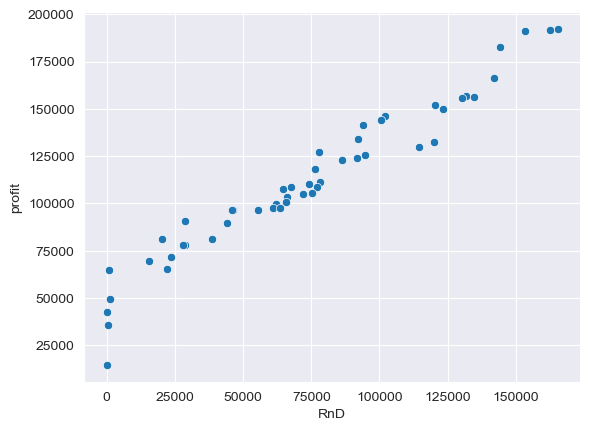

In [77]:
sns.scatterplot(data = df ,x=df['RnD'],y=df['profit']);


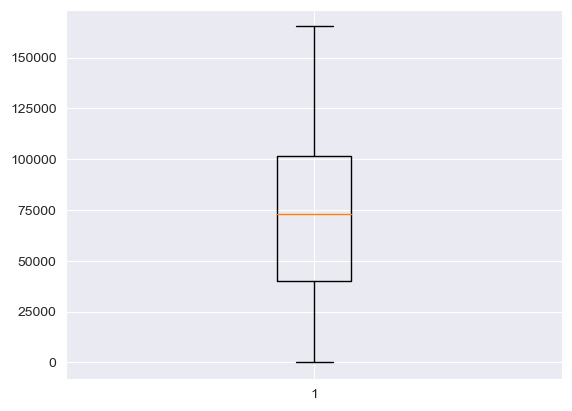

In [78]:
plt.boxplot(data = df,x=df['RnD']);

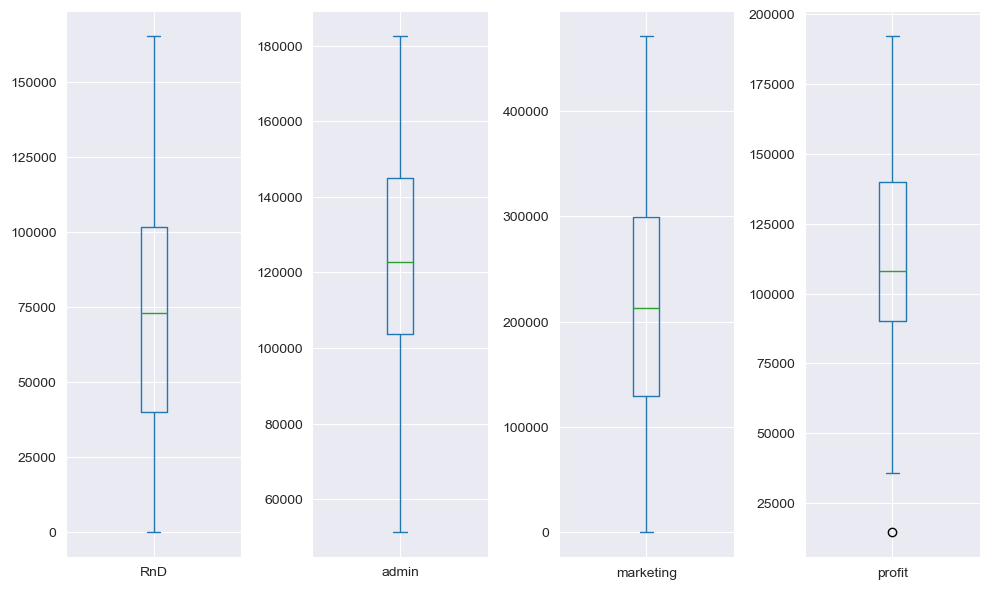

In [79]:
df[['RnD','admin','marketing','profit']].plot(kind='box',subplots=True,figsize=(10,6))
plt.tight_layout()

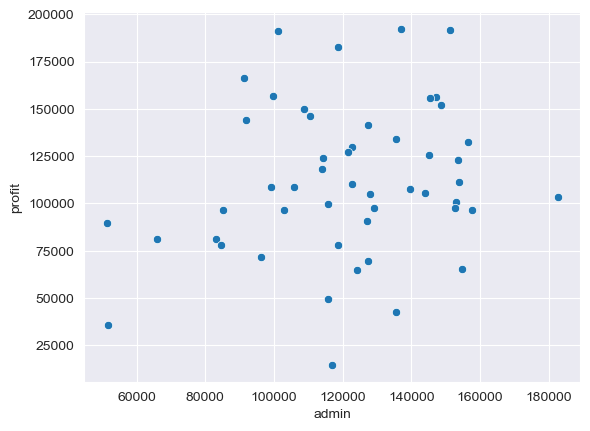

In [80]:
sns.scatterplot(data = df ,x=df['admin'],y=df['profit']);

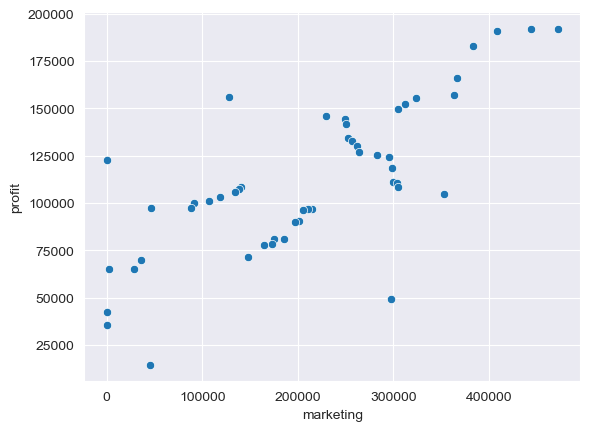

In [81]:
sns.scatterplot(data = df ,x=df['marketing'],y=df['profit']);

In [82]:
import statsmodels.formula.api as smf

In [83]:
ols = smf.ols('profit~RnD+admin+marketing',data = df)

In [84]:
model = ols.fit()

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           4.53e-30
Time:                        13:45:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='profit'>

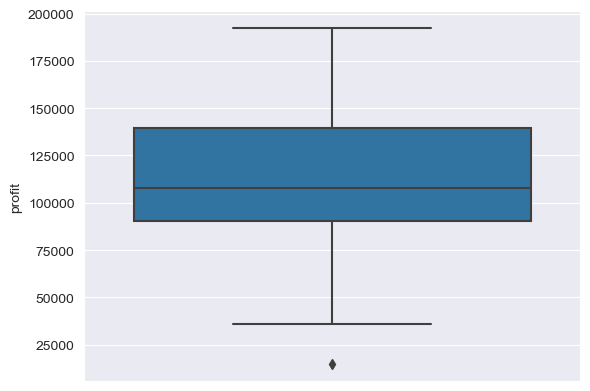

In [86]:
sns.boxplot(y = df['profit'])

In [87]:
# We have an outlier in the target(Profit) column
#Lets drop that row and then check the model 

In [88]:
df.min()

RnD              0.00
admin        51283.14
marketing        0.00
profit       14681.40
dtype: float64

In [89]:
df1 = df.drop(index=49)

In [90]:
df1

,RnD,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [91]:
# Lets build a model after droping the outlier.

In [92]:
ols1 = smf.ols('profit~RnD+admin+marketing',data = df1)

In [93]:
model1 = ols1.fit()

In [94]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           8.85e-32
Time:                        13:46:46   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD            0.7830      0.038     20.470      0.000       0.706       0.860
admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
marketing      0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
# Model is now better then the previous one ,as R-squared and adj.rsquared has been increased.

In [96]:
#Calculating Variance Inflation Factor (VIF) = 1/1-r^2


rsq_rds = smf.ols('RnD~admin+marketing',data=df1).fit().rsquared  
vif_rds = 1/(1-rsq_rds) 
vif_rds


rsq_adm = smf.ols('admin~RnD+marketing',data=df1).fit().rsquared  
vif_adm = 1/(1-rsq_adm) 
vif_adm

rsq_mks = smf.ols('marketing~RnD+admin',data=df1).fit().rsquared  
vif_mks = 1/(1-rsq_mks) 
vif_mks

# Storing vif values in a data frame
d1 = {'Variables':['RDS','ADM','MKS'],'VIF':[vif_rds,vif_adm,vif_mks]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
     

,Variables,VIF
0,RDS,2.377754
1,ADM,1.175172
2,MKS,2.239957


In [97]:
# Residual Analysis

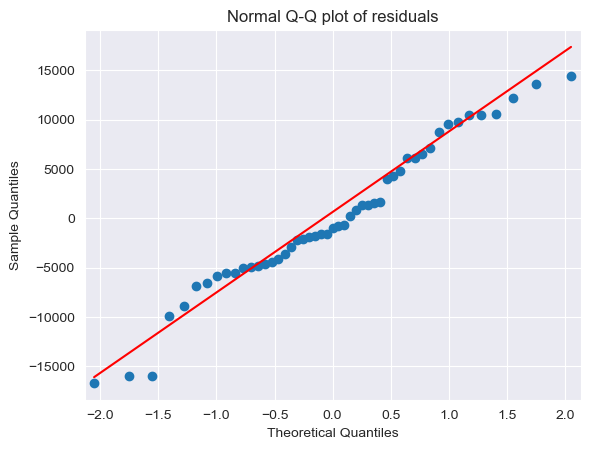

In [98]:
# QQ PLOT
import statsmodels.api as sm
sns.set_style(style='darkgrid')
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [99]:
list(np.where(model1.resid<-10000))
     

[array([14, 15, 48], dtype=int64)]

In [100]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()  #User Defined Function Z = (x-mu)/sigma
     

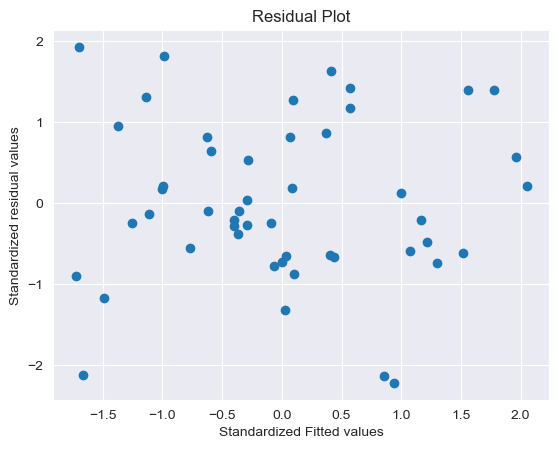

In [101]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()
     

eval_env: 1


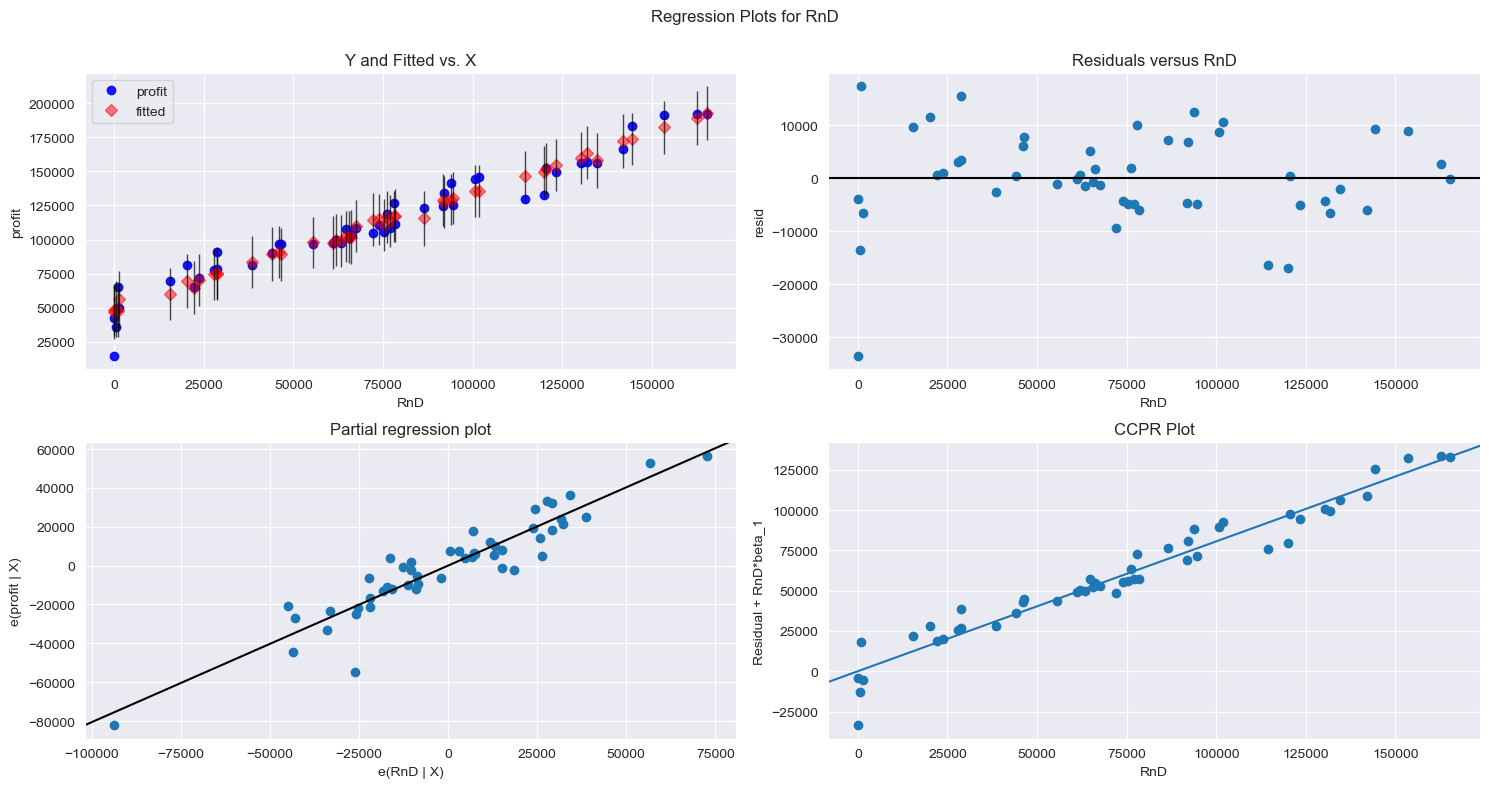

In [102]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnD", fig=fig)
plt.show()
     

eval_env: 1


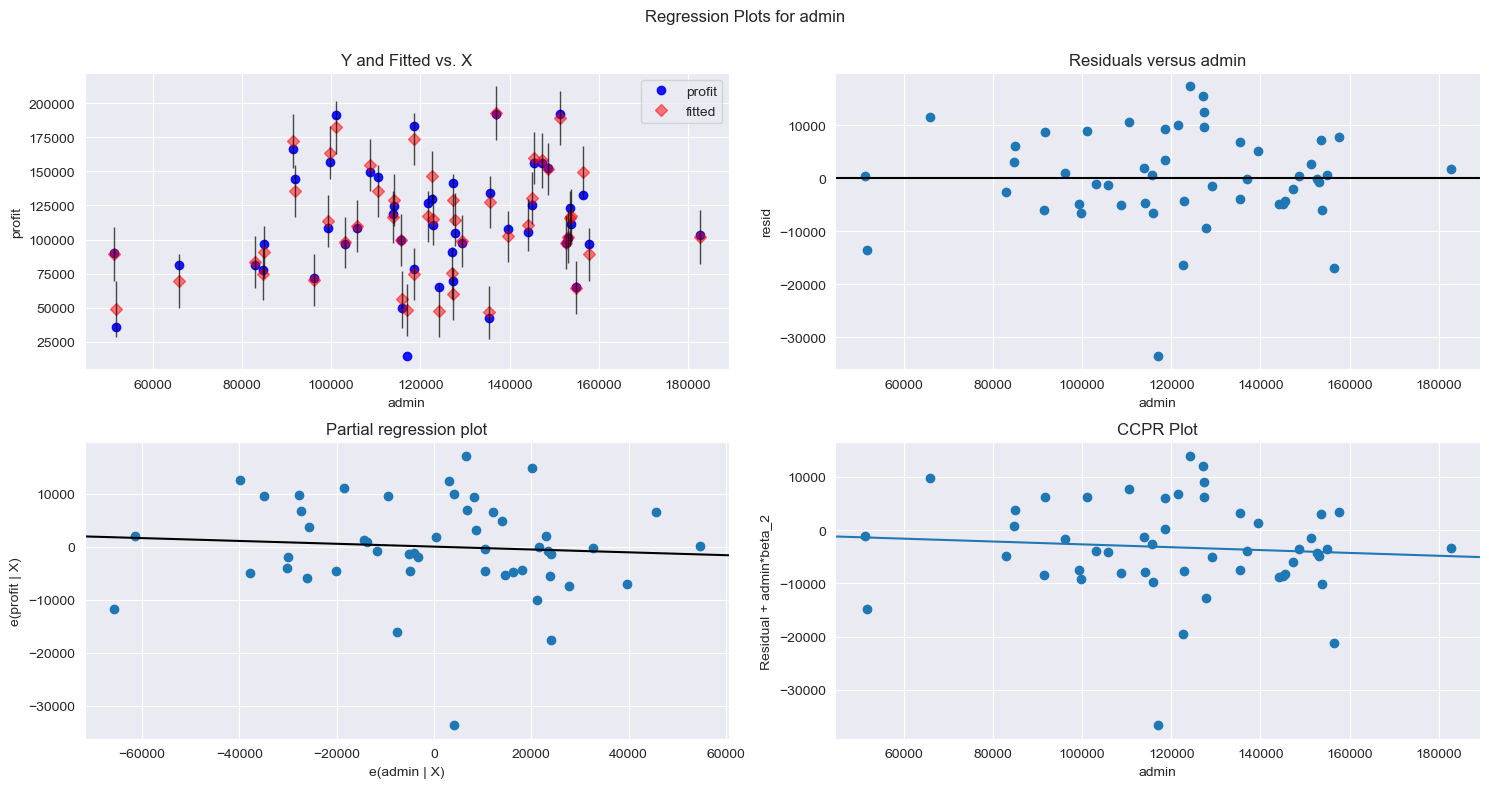

In [103]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "admin", fig=fig)
plt.show()
     

eval_env: 1


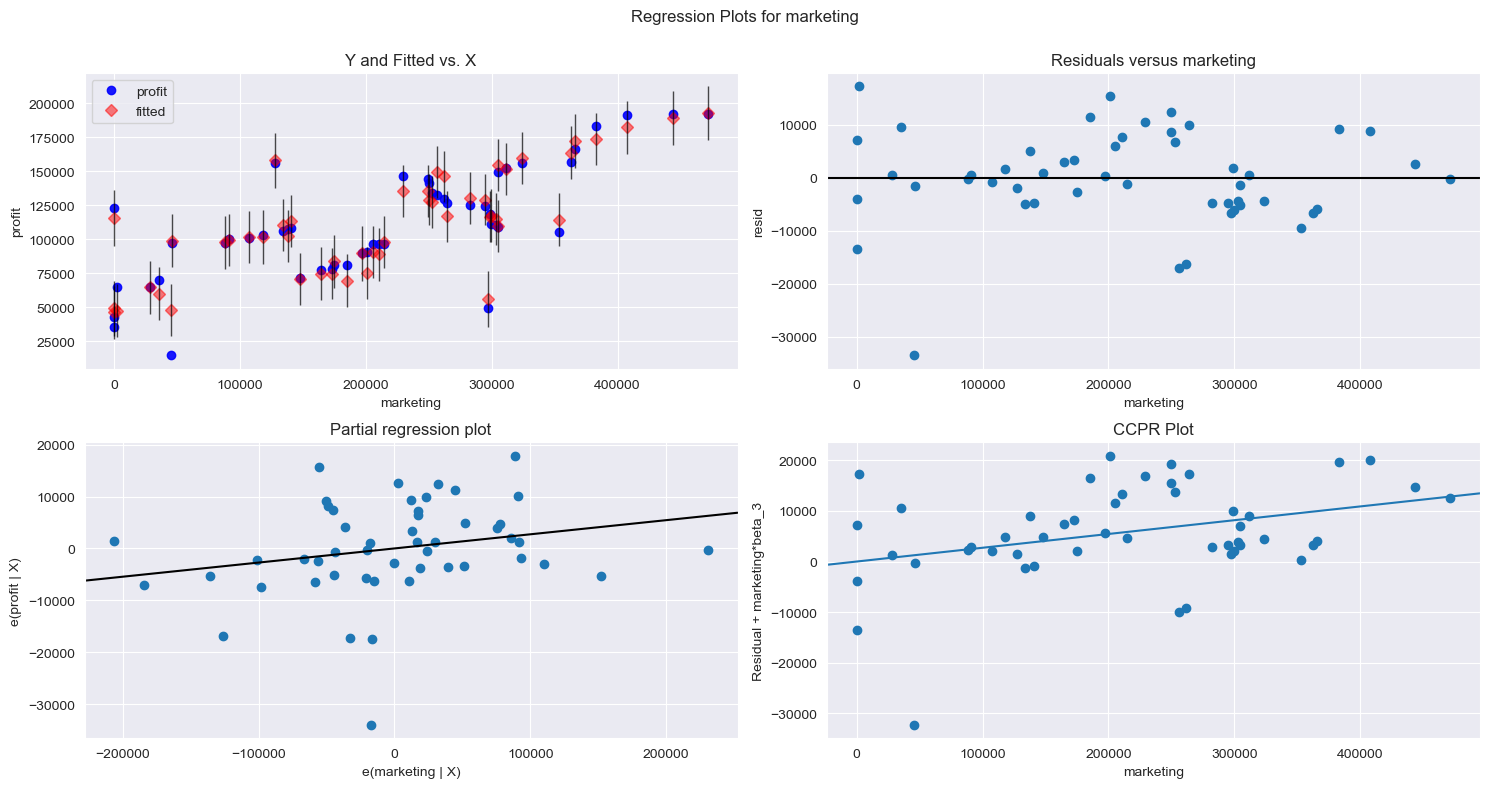

In [104]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "marketing", fig=fig)
plt.show()

In [105]:
# Model Deletion Diagnostics

In [106]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance
     

In [107]:
# Storing vif values in a data frame
d1 = {'Variables':['RDS','ADM','MKS'],'VIF':[vif_rds,vif_adm,vif_mks]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
     

,Variables,VIF
0,RDS,2.377754
1,ADM,1.175172
2,MKS,2.239957


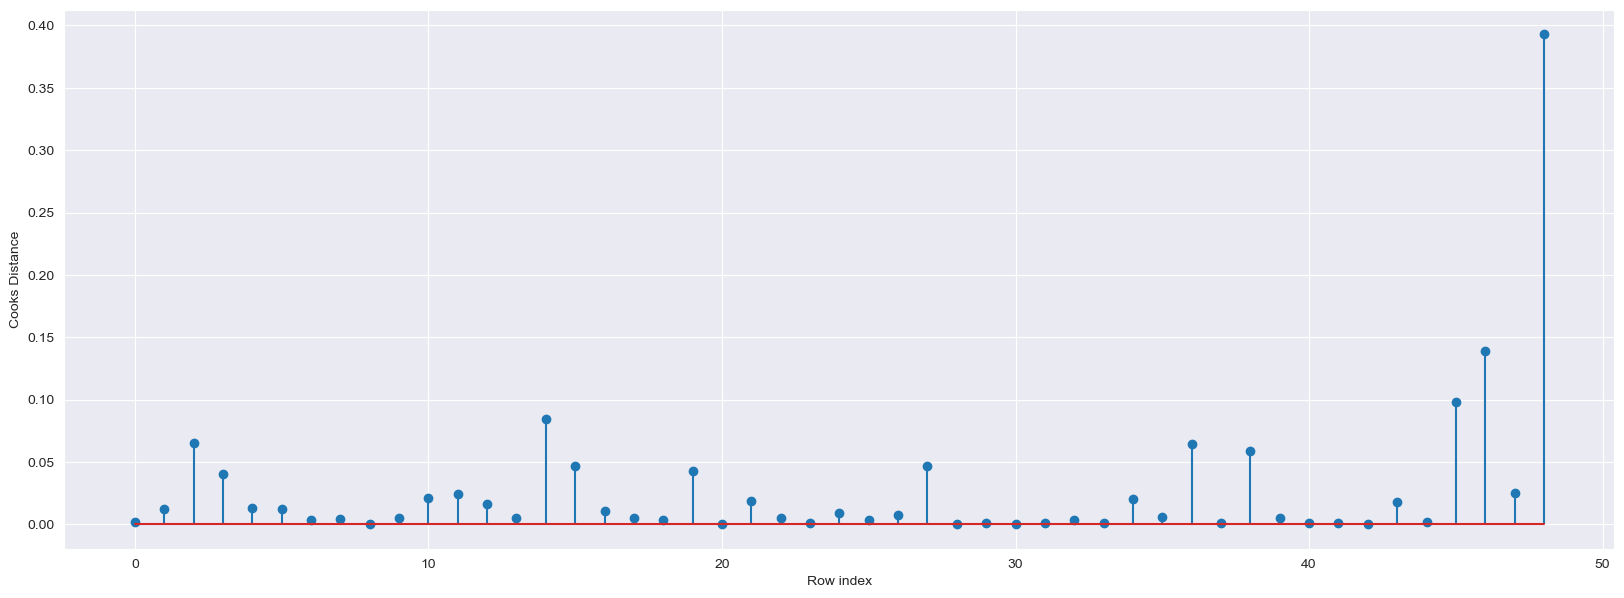

In [108]:
#Plot the influencers values using stem plot
sns.set_style(style='darkgrid')
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [109]:
# High Influence Plots
from statsmodels.graphics.regressionplots import influence_plot


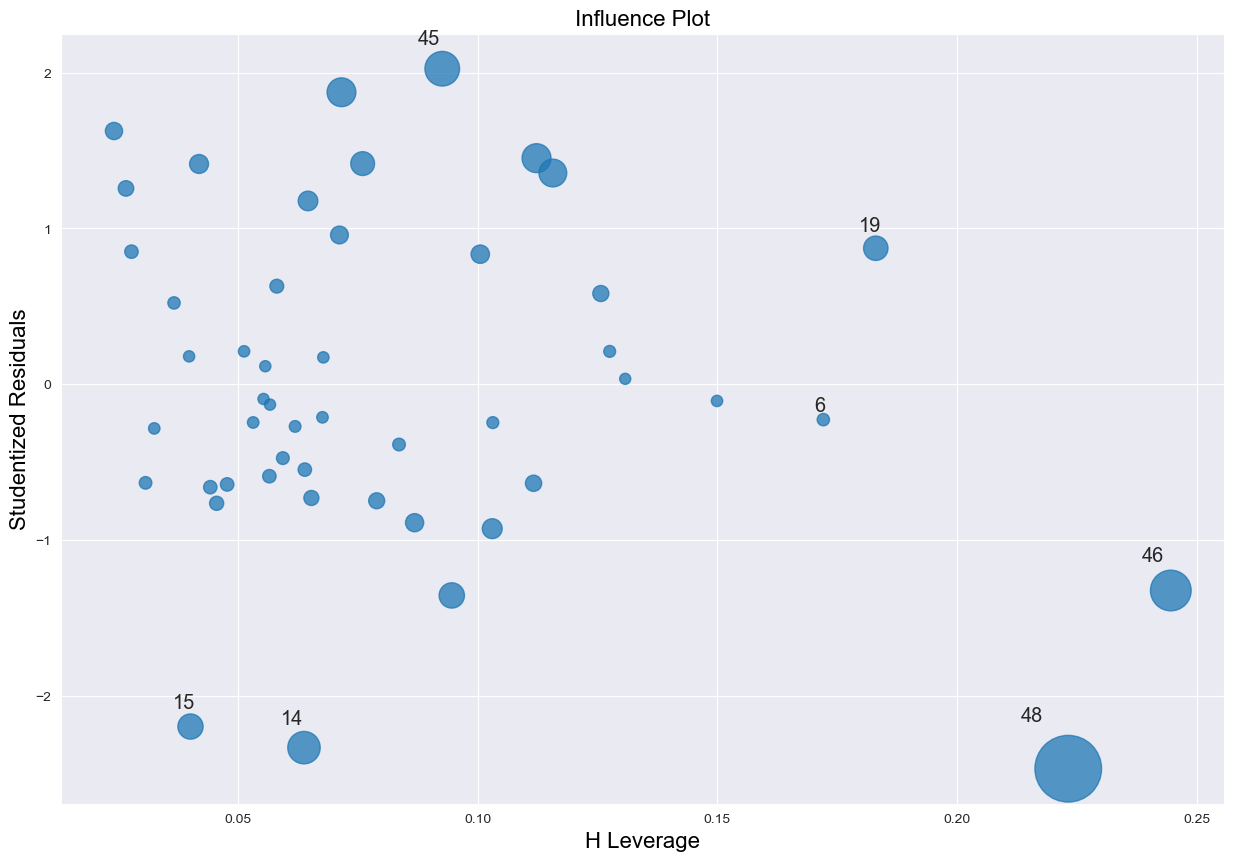

In [110]:
fig,ax=plt.subplots(figsize=(15,10))
fig=influence_plot(model1,ax = ax)

In [111]:
k = df1.shape[1]     # k = no.of features/columns & n = no. of datapoints
n = df1.shape[0] 
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff
     

0.30612244897959184

In [112]:
df1[df1.index.isin([48])]

,RnD,admin,marketing,profit
48,542.05,51743.15,0.0,35673.41


In [113]:
df1.shape

(49, 4)

In [114]:
#Discard the data points which are influencers and reasign the row number (reset_index())
St2=df1.copy()
St2
     

,RnD,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [115]:

# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
St2=df1.drop(df1.index[[48]],axis=0).reset_index(drop=True)
St2
     

,RnD,admin,marketing,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [64]:
Final_Model = smf.ols('profit~RnD+admin+marketing',data=St2).fit()
     

In [65]:
Final_Model .summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           2.03e-31
Time:                        13:36:02   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RnD            0.7895      0.036     21.718      0.000       0.716       0.863
admin         -0.0633      0.044     -1.442      0.156      -0.152       0.025
marketing      0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
final_predicted = pd.DataFrame(St2)
final_predicted['Predicted Profit']= Final_Model.predict()

In [67]:
final_predicted

,RnD,admin,marketing,profit,Predicted Profit
0,165349.20,136897.80,471784.10,192261.83,188939.277484
1,162597.70,151377.59,443898.53,191792.06,185378.579127
2,153441.51,101145.55,407934.54,191050.39,180724.354190
3,144372.41,118671.85,383199.62,182901.99,172036.176973
4,142107.34,91391.77,366168.42,166187.94,171688.341312
5,131876.90,99814.71,362861.36,156991.12,163022.000480
6,134615.46,147198.87,127716.82,156122.51,158209.614122
7,130298.13,145530.06,323876.68,155752.60,158220.907984
8,120542.52,148718.95,311613.29,152211.77,150109.699290
9,123334.88,108679.17,304981.62,149759.96,154738.693091
